In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Updating fastai...
Done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
path = Path(base_dir + 'rossman')

In [4]:
from fastai.tabular import *
from pathlib import Path

In [6]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [ ]:
train_df.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,file,week,trend,file_DE,week_DE,trend_DE,Date_DE,...,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Since,Promo2Days,Promo2Weeks,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,NaN,0.0,1.0,Fog,13,Hessen,2008-09-15,2510,24,1900-01-01,0,0,0,0,57,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,13,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,NaN,0.0,4.0,Fog,309,Thueringen,2007-11-15,2815,24,2010-03-29,1950,25,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,13,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,NaN,0.0,2.0,Fog,354,NordrheinWestfalen,2006-12-15,3150,24,2011-04-04,1579,25,0,0,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,c,620.0,9,2009,0,1,1900,NaN,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,14,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,NaN,0.0,6.0,NaN,282,Berlin,2009-09-15,2145,24,1900-01-01,0,0,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,29910.0,4,2015,0,1,1900,NaN,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,...,15,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,NaN,0.0,4.0,NaN,290,Sachsen,2015-04-15,107,3,1900-01-01,0,0,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 100000, "display.max_columns", 100000): 
        display(df)

In [ ]:
display_all(train_df.describe())

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,trend,trend_DE,Month_DE,Day_DE,Dayofweek_DE,Dayofyear_DE,Elapsed_DE,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
count,8.443380e+05,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,8.443380e+05,842152.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,8.443380e+05,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.00000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,823710.000000,823710.000000,823710.000000,844338.000000,844338.000000,194051.000000,844338.000000,776282.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.00000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,5.086104e+05,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,23.646946,15.835706,2.520350,162.387649,1.397179e+09,5458.156627,5.244601,1974.118927,0.498670,12.097489,1955.728328,65.218807,66.241356,5.896641,15.612710,6.0,163.696676,1.397292e+09,14.412367,10.136200,5.942412,8.257637,5.880459,3.31454,93.257149,73.918404,49.852122,1018.675418,1015.429847,1012.425700,23.469737,12.115660,7.303096,22.656977,11.847106,48.588227,0.771918,5.526624,175.783602,1229.002106,12.533667,398.091538,10.345140,23.379337,-23.87748,38.256821,-36.859878,2.783563,-2.869317,1.193387,0.176589,2.647116,1.196713,0.169327,2.705728
std,2.936990e+05,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,14.389931,8.683392,1.723712,101.368955,2.371630e+07,7809.573181,3.928361,50.865676,0.499999,14.931876,55.889109,11.417771,9.718904,3.302476,8.734867,0.0,100.930079,2.377049e+07,8.518530,7.266376,6.473334,6.153139,5.982721,6.00176,7.721482,13.211948,19.661014,7.900600,8.241258,8.751143,9.231186,4.896058,4.794199,9.011940,5.933212,13.367280,2.483500,1.691476,101.428190,1561.887383,11.418696,578.564174,12.163052,22.043787,23.00916,31.008136,32.587083,4.913429,3.193761,2.018660,0.437335,1.794482,2.026799,0.430947,1.787265
min,0.000000e+00,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.356998e+09,20.000000,1.000000,1900.000000,0.000000,1.000000,1900.000000,28.000000,50.000000,1.000000,1.000000,6.0,4.000000,1.357430e+09,-11.000000,-13.000000,-15.000000,-14.000000,-15.000000,-73.00000,44.000000,30.000000,4.000000,976.000000,974.000000,970.000000,0.000000,0.000000,0.000000,3.000000,2.000000,21.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-194.00000,0.000000,-195.000000,0.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.560092e+05,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,11.000000,8.000000,1.000000,75.000000,1.376611e+09,710.000000,1.000000,1900.000000,0.000000,1.000000,1900.000000,57.000000,58.000000,3.000000,8.000000,6.0,76.000000,1.376784e+09,8.00000

In [7]:
 train_df.select_dtypes(include=[int,float]).columns

Index(['index', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Elapsed', 'CompetitionDistance', 'Promo2', 'trend',
       'trend_DE', 'Month_DE', 'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE',
       'Elapsed_DE', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'WindDirDegrees',
       'CompetitionDaysOpen', 'CompetitionMonthsOpen', 'Promo2Days',
       'Promo2Weeks', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
    

In [ ]:
train_df['Store'].head().unique()

array([1, 2, 3, 4, 5])

In [ ]:
col_des =[(x,len(train_df[x].unique()),train_df[x].dtype) for x in train_df.columns]

In [ ]:
cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [ ]:
cont_des = [(x,len(train_df[x].unique()),train_df[x].dtype) for x in cont_vars]

In [ ]:
for x in cont_des:
  print(x,'\n')

('CompetitionDistance', 655, dtype('float64')) 

('Max_TemperatureC', 50, dtype('int64')) 

('Mean_TemperatureC', 45, dtype('int64')) 

('Min_TemperatureC', 40, dtype('int64')) 

('Max_Humidity', 50, dtype('int64')) 

('Mean_Humidity', 71, dtype('int64')) 

('Min_Humidity', 93, dtype('int64')) 

('Max_Wind_SpeedKm_h', 42, dtype('int64')) 

('Mean_Wind_SpeedKm_h', 27, dtype('int64')) 

('CloudCover', 10, dtype('float64')) 

('trend', 67, dtype('int64')) 

('trend_DE', 38, dtype('int64')) 

('AfterStateHoliday', 136, dtype('int64')) 

('BeforeStateHoliday', 147, dtype('int64')) 

('Promo', 2, dtype('int64')) 

('SchoolHoliday', 2, dtype('int64')) 



In [ ]:
len(train_df),len(test_df)

(844338, 41088)

In [8]:
procs = [FillMissing, Categorify, Normalize]


In [9]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [10]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [11]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()

In [12]:
cut

41395

In [13]:
valid_idx = range(cut)


In [ ]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [14]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

## Model

In [15]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [ ]:
torch.cuda.is_available()

True

In [16]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [17]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_runn

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


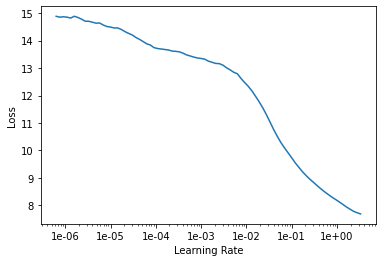

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3,3e-2,wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.129680,0.106911,0.479564,03:59
1,0.048007,0.045591,0.231107,03:58
2,0.015349,0.016333,0.119338,03:59


In [21]:
learn.save('1')

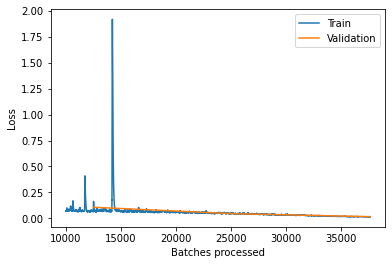

In [22]:
learn.recorder.plot_losses(skip_start=10000)

In [23]:
learn.load('1')

Learner(data=TabularDataBunch;

Train: LabelList (802943 items)
x: TabularList
Store 1115; DayOfWeek 5; Year 2015; Month 6; Day 19; StateHoliday False; CompetitionMonthsOpen 0; Promo2Weeks 25; StoreType d; Assortment c; PromoInterval Mar,Jun,Sept,Dec; CompetitionOpenSinceYear 1900; Promo2SinceYear 2012; State HE; Week 25; Events Rain; Promo_fw 1.0; Promo_bw 5.0; StateHoliday_fw 0.0; StateHoliday_bw 0.0; SchoolHoliday_fw 0.0; SchoolHoliday_bw 0.0; CompetitionDistance_na False; CloudCover_na False; CompetitionDistance -0.0130; Max_TemperatureC 0.1333; Mean_TemperatureC 0.4683; Min_TemperatureC 0.8602; Max_Humidity 0.0780; Mean_Humidity -0.3412; Min_Humidity -0.0811; Max_Wind_SpeedKm_h -0.1780; Mean_Wind_SpeedKm_h 0.1902; CloudCover 0.2552; trend 0.4066; trend_DE 0.5969; AfterStateHoliday -0.7329; BeforeStateHoliday 1.1848; Promo 1.1119; SchoolHoliday -0.4796; ,Store 1; DayOfWeek 4; Year 2015; Month 6; Day 18; StateHoliday False; CompetitionMonthsOpen 24; Promo2Weeks 0; StoreType c; Assor

In [24]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.014785,0.016101,0.120949,04:01
1,0.017550,0.014763,0.113080,04:03
2,0.013520,0.014898,0.112657,03:59
3,0.013424,0.016212,0.111952,03:58
4,0.011297,0.013243,0.110333,04:00
